In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

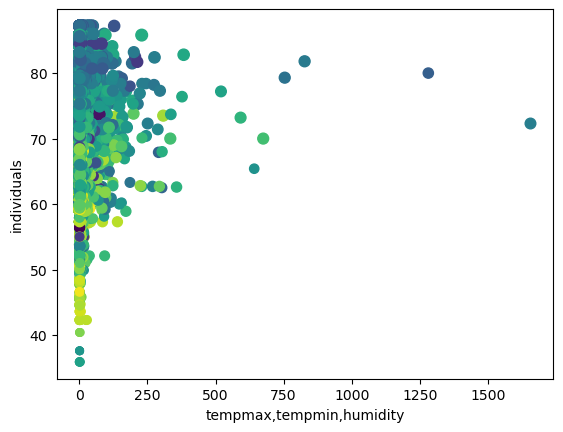

In [8]:
plt.scatter(df.individuals, df.tempmax, df.tempmin, df.humidity)
plt.xlabel('tempmax,tempmin,humidity')
plt.ylabel('individuals')
plt.show()

In [4]:
#data = Path('./Resources/combined_data.csv')
data = Path('./Resources/CombinedTop5_chg.csv')
df = pd.read_csv(data)
df.head()

,order_name,family_name,datetime,individuals,tempmax,tempmin,temp_daily,humidity
0,COLEOPTERA,CARABIDAE,37822,2,76.9,60.9,69.9,69.9
1,COLEOPTERA,CARABIDAE,36698,3,86.0,64.1,75.6,67.5
2,COLEOPTERA,CARABIDAE,39243,1,81.7,60.4,71.9,55.4
3,COLEOPTERA,CARABIDAE,33787,1,71.2,58.8,65.5,59.2
4,COLEOPTERA,CARABIDAE,34112,1,73.3,55.2,63.3,66.8


In [5]:
# Segment the features from the target
y = df["individuals"]
#X = df.drop(columns=["order_name", "family_name", "datetime", "individuals", "tempmax","tempmin"])
X = df.drop(columns=["order_name", "family_name", "datetime", "individuals"])

In [6]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#X_train.shape
print(y_test)

18207    1
7254     4
11600    1
19327    1
13757    6
        ..
6797     1
25919    1
28046    1
14906    1
22548    2
Name: individuals, Length: 7790, dtype: int64


In [15]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [16]:
# Calculated the balanced accuracy score
y_pred = rf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.004545454545454545

In [17]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0, ..., 51,  0, 11],
       [ 0,  0,  0, ..., 14,  0,  0],
       [ 0,  0,  0, ...,  9,  0,  2],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [18]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.00      0.00      1.00      0.00      0.00      0.00      3897
          2       0.00      0.00      1.00      0.00      0.00      0.00      1239
          3       0.00      0.00      1.00      0.00      0.00      0.00       669
          4       0.00      0.00      1.00      0.00      0.00      0.00       383
          5       0.00      0.00      1.00      0.00      0.00      0.00       296
          6       0.00      0.00      1.00      0.00      0.00      0.00       208
          7       0.00      0.00      1.00      0.00      0.00      0.00       160
          8       0.00      0.00      1.00      0.00      0.00      0.00        97
          9       0.00      0.00      1.00      0.00      0.00      0.00        82
         10       0.00      0.00      1.00      0.00      0.00      0.00        67
         11       0.00      0.00      1.00      0.00      0.00      0.00        71
   

In [19]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
importances
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.25550263374599264, 'humidity'),
 (0.2505717264962924, 'tempmax'),
 (0.24778362540076238, 'temp_daily'),
 (0.24614201435695268, 'tempmin')]

In [20]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [21]:
# Calculated the balanced accuracy score
y_pred = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.0

In [ ]:
# Tableau Visualization
# https://public.tableau.com/authoring/MOTH_V_BEETLE/Story1#1